In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, cauchy

sns.set()
np.random.seed()
plt.rcParams["figure.figsize"] = (10.0, 7.0)

In [8]:
# Example: generating cauchy random variables
sample = cauchy.rvs(size=1000)
sample

array([ 1.49638894e-01,  9.61035108e-01, -3.69873311e+00, -8.31072666e-01,
       -7.74103282e-01,  2.53351989e+00, -3.75516638e-01,  9.01022017e+00,
       -1.06789068e+00,  1.45718180e+01, -9.06590106e-01, -4.25567051e-01,
       -1.50092607e+00,  3.00363875e+00,  1.42598449e+00, -6.36774864e-01,
       -4.28345229e-01, -6.47538893e-01,  6.15462914e+00, -9.08990589e-01,
       -8.32986937e-01, -8.00332737e-01, -2.61918069e+00,  3.76047101e-01,
        1.87814285e+00, -1.45958794e+00,  1.59307433e+00, -4.98950673e+01,
        7.84187646e-01,  1.71745855e+00,  2.88419175e-01, -5.20264011e+00,
       -9.54133200e-02,  6.44304293e-01,  5.67596537e-01, -1.50835223e-01,
       -2.89333490e+00, -1.48720392e+00, -2.65009254e-01, -2.19141625e+00,
        6.03127647e-01,  1.20930739e+01, -8.89634056e-01, -8.29857439e+00,
        1.56406363e+00,  5.54575426e+00,  7.47353336e-01,  1.40310535e+01,
       -1.09073854e+01, -1.03394557e+00, -1.25230285e+00,  1.72403490e+00,
        7.15024865e+00,  

In [9]:
a,b = norm.interval(alpha=0.95, loc=0., scale=1.)
print(a, b)

-1.959963984540054 1.959963984540054


In [10]:
def f(x):
    if x >= 2:
        return 1
    
    return 0

In [13]:
start = time.time()

# Main: crude Monte Carlo method
size = 5000
cauchy_rvs = cauchy.rvs(size=size)
_, b = norm.interval(alpha=0.95, loc=0., scale=1.)

fs = np.where(cauchy_rvs >= 2, 1, 0)
sums = np.cumsum(fs)
avgs = np.zeros(size)
conf_95 = np.zeros(size)

for i in range(0, size):
    avgs[i] = sums[i] / (i+1)
    if i == 0: continue
    conf_95[i] = (1 / np.sqrt(i+1)) * np.sqrt((1 / i) * np.sum((fs[:i+1] - avgs[i])**2)) * b

end = time.time() - start
print(end)

0.1105489730834961


21.5001289

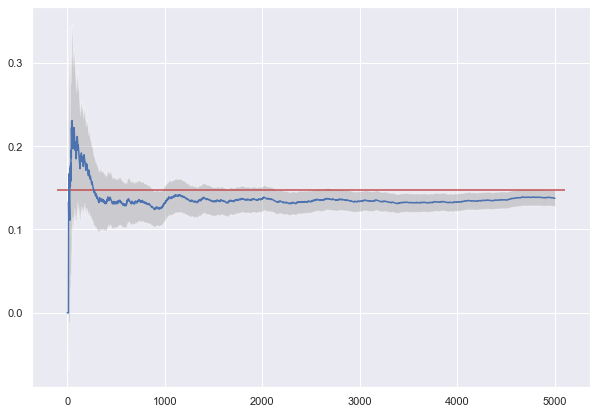

In [14]:
# Plot true value
plt.hlines([1/2-np.arctan(2)/np.pi], -100, size+100, color="r")

# Plot averages
plt.plot(avgs)

# Plot confidence interval
xs = np.linspace(0, size, size)
ub = avgs + conf_95
lb = avgs - conf_95
plt.fill_between(xs, lb, ub, facecolor='gray',alpha=0.3)

conf_95
2.15001289e+01